Related to gradient-wall-in-rnn-1, with views from more perspectives.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

import numpy as np

mpl.style.use('classic')

In [2]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [3]:
def recurrent(w, b=0, num_steps=50):
    # Eq. 8 in http://proceedings.mlr.press/v28/pascanu13.pdf
    """num_steps=50 is from the paper, no input: meaning at each time step there is only hidden input from the previous step"""
    x_prev = 0
    for i in range(num_steps):
        x = w * sigmoid(x_prev) + b
        x_prev = x
    return x

In [4]:
def loss(w, b=0, steps=50, target=1):
    return np.square(recurrent(w, b, steps) - target)

# Same plot as in gradient-wall-in-rnn-1, but with consistent view angle

0, 1, 2, 3, 

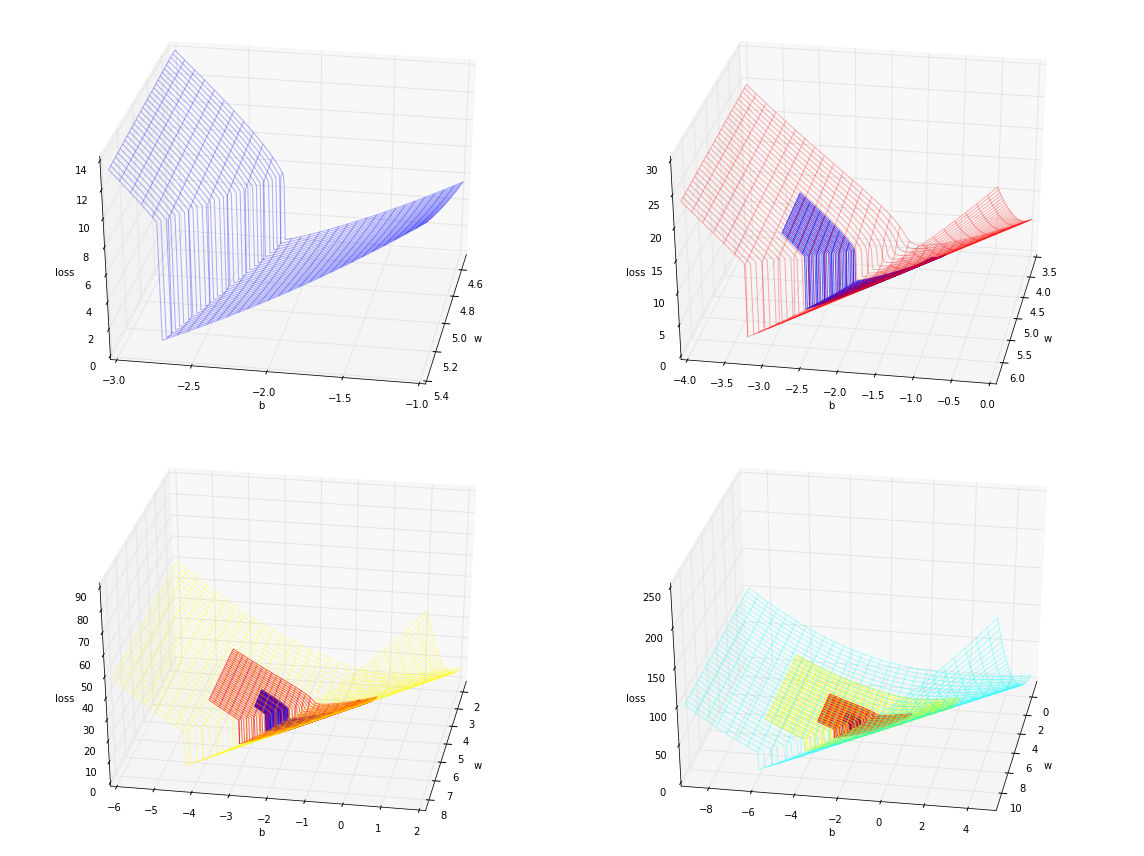

In [48]:
fig = plt.figure(figsize=(16, 12))

xlim = (4.5, 5.4)
ylim = (-3, -1)
XYS_list = []
colors = ['blue', 'red', 'yellow', 'cyan']
for k in range(4):
    factor = 1
    xlim = [xlim[0] - factor * k, xlim[1] + factor * k]
    ylim = [ylim[0] - factor * k, ylim[1] + factor * k]
    
    print(k, end=', ')
    ax = fig.add_subplot(2, 2, k + 1, projection='3d')
    
    ws = np.linspace(*xlim, 300)
    bs = np.linspace(*ylim, 300)
    
    _X, _Y = np.meshgrid(ws, bs)
    # the target=1 is a guess, not sure what it is exactly in the paper, but it turns out to be a reasonable guess
    _Z = loss(_X, _Y, target=1)

    XYS_list.append([_X, _Y, _Z])
    for kk, ((x, y, z), col) in enumerate(reversed(list(zip(XYS_list, colors)))):
        surf = ax.plot_wireframe(x, y, z, rstride=10, cstride=10, color=col, alpha=min(0.3 * (kk + 1), 1))

    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('loss')
    ax.view_init(elev=32, azim=10)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.tight_layout()

This view gives an idea how small the region shown in the paper is. Colors are consistent, e.g. the blue region in the second subplot is identical to that in the first subplot, just scaled differently

# Wall formation as recurrence increases in 3D

1, 2, 3, 5, 7, 10, 30, 50, 100, 

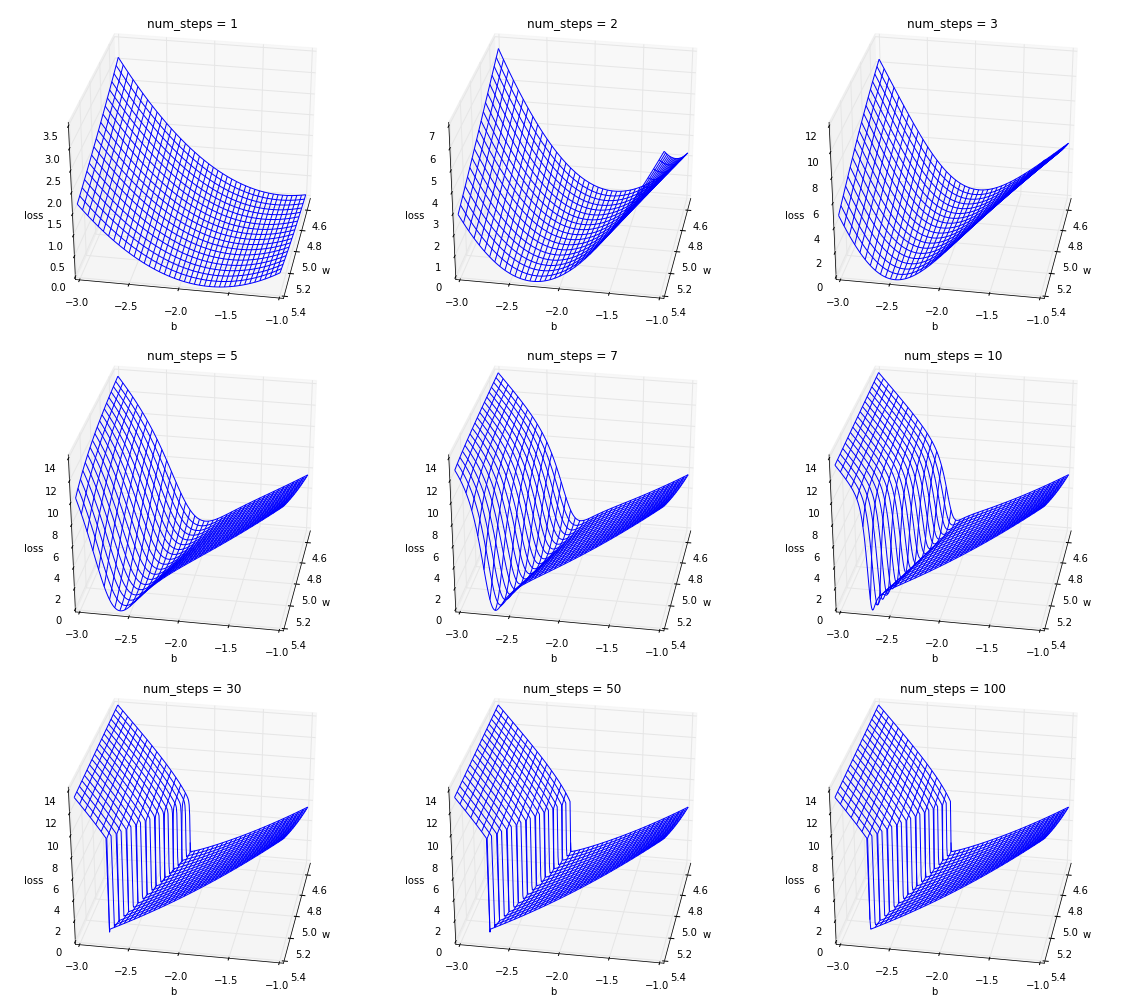

In [49]:
fig = plt.figure(figsize=(16, 14))

num_steps_list = [1, 2, 3, 5, 7, 10, 30, 50, 100]
for k, num_steps in enumerate(num_steps_list):
    print(num_steps, end=', ')
    ax = fig.add_subplot(3, 3, k + 1, projection='3d')
    
    xlim = (4.5, 5.4)
    ylim = (-3, -1)

    ws = np.arange(*xlim, 0.005)
    bs = np.arange(*ylim, 0.005)

    X0, Y0 = np.meshgrid(ws, bs)
    # the target=1 is a guess, not sure what it is exactly in the paper, but it turns out to be a reasonable guess
    Z0 = loss(X0, Y0, steps=num_steps, target=1)
    
    # surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    surf = ax.plot_wireframe(X0, Y0, Z0, rstride=10, cstride=10)
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('loss')

    ax.view_init(elev=32, azim=10)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title('num_steps = {0}'.format(num_steps))
plt.tight_layout()

A wall form as the num_steps increases, but then converges.